In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as plt

def preprocess (img, label):
    return tf.image.resize(img, [200, 200])/255, label)
    
split = ["train[:70%]", "train[70%:]"]

trainDataset, testDataset = tfds.load(name = 'cats_vs_dogs', split = split, as_supervised = True)

trainDataset = trainDataset.map(preprocess).batch(32)

testDataset = testDataset.map(preprocess).batch(32)

model = keras.Sequential([
keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (200, 200, 3)),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
keras.layers.MaxPooling2D((2,2)), 
keras.layers.Flatten(),
keras.layers.Dense (512, activation = 'relu'),
keras.layers.Dense (1, activation = 'sigmoid'),
])
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

trainHistory = model.fit(trainDataset, epochs=10, validation_data=testDataset)

plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel ('Accuracy')
plt.xlabel("Epoch")
plt.legend (['Training', 'Validation']) 
plt.grid() 
plt.show()

(loss, accuracy) = model.evaluate (testDataset)3
print(loss)
print(accuracy)



SyntaxError: unmatched ')' (201042685.py, line 7)

3/3 [==============================] - 1s 176ms/step


/var/folders/lx/jlk9_tzj38z56vh65c8vm7080000gn/T/ipykernel_68504/422932479.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictedLabel = int(predictions[i] >= 0.5)


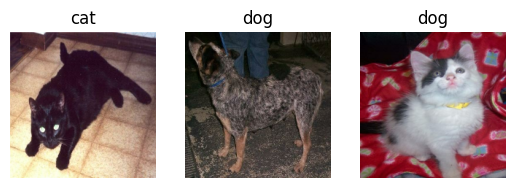